<a href="https://colab.research.google.com/github/juyeon-shin/CLUB-D.N.A./blob/main/2022/05.%20%EB%8B%A4%EC%9D%B4%EC%95%84%EB%AA%AC%EB%93%9C%20%EA%B0%80%EA%B2%A9%20%EC%98%88%EC%B8%A1/220811_%EC%A3%BC%EC%97%B0_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('/content/drive/Shareddrives/202206 나의 분석일지/다이아몬드 가격 예측/Diamonds Prices2022.csv')

In [ ]:
train = train.drop(['Unnamed: 0'],axis=1)
train

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


### 데이터 타입

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
train.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
train.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### 전체 데이터 EDA

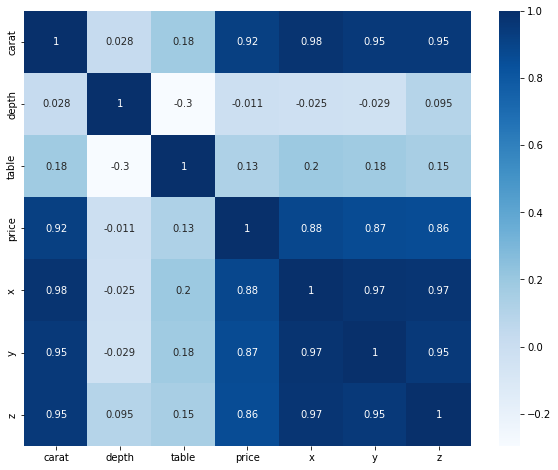

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(),cmap='Blues',annot=True)

가격과 상관관계가 높은 변수
+ carat
+ x,y,z

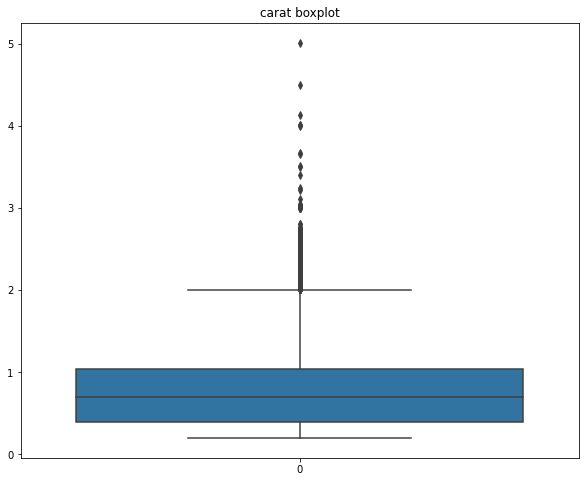

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

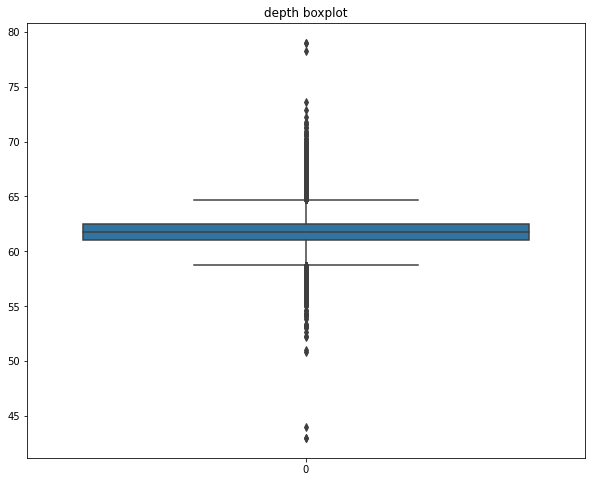

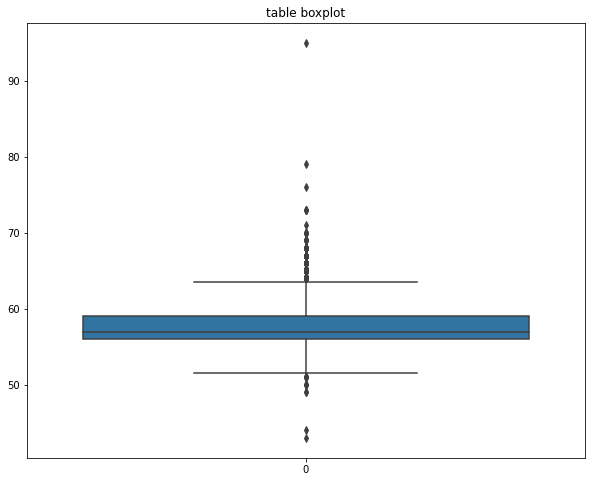

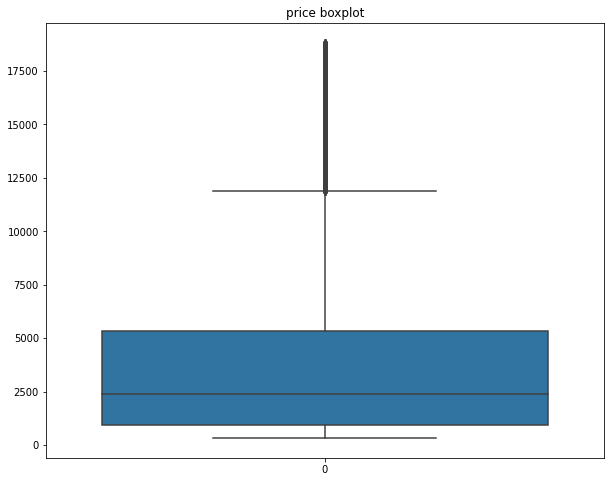

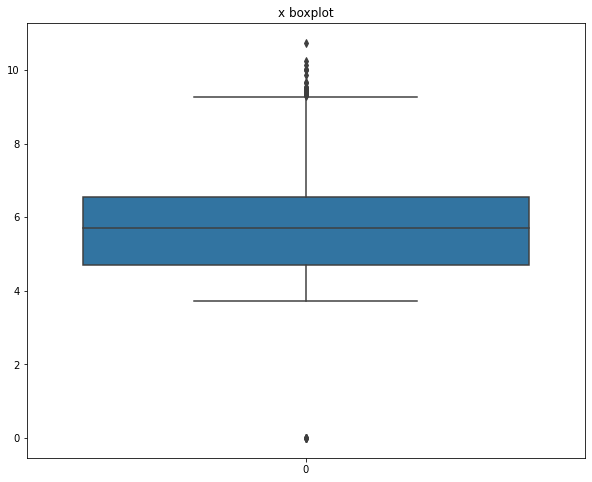

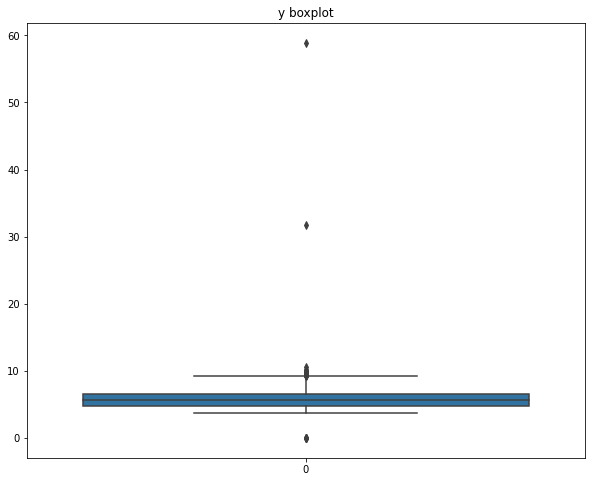

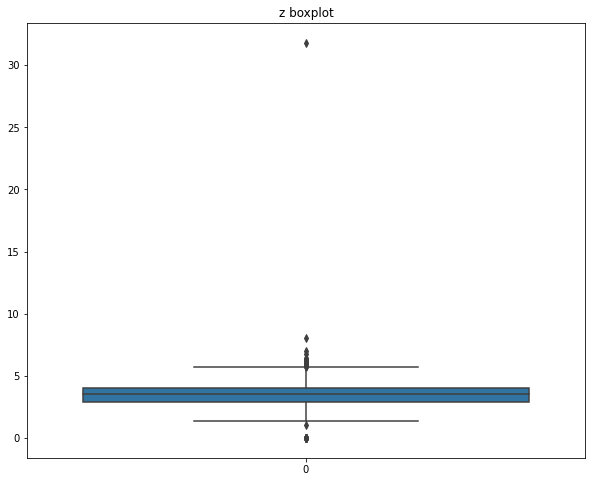

In [ ]:
for i in train.columns:
  try :
    plt.figure(figsize=(10,8))
    sns.boxplot(data=train[i])
    plt.title('%s boxplot'%i)
    plt.show()
  except:
    pass

### 범주형 변수 EDA

In [ ]:
train_cat = train[['cut','color','clarity','price']]
train_cat

,cut,color,clarity,price
0,Ideal,E,SI2,326
1,Premium,E,SI1,326
2,Good,E,VS1,327
3,Premium,I,VS2,334
4,Good,J,SI2,335
...,...,...,...,...
53938,Premium,H,SI2,2757
53939,Ideal,D,SI2,2757
53940,Premium,E,SI1,2756
53941,Premium,F,SI1,2756


In [ ]:
for i in train_cat.columns:
  print(i)
  print(train_cat[i].unique())

cut
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color
['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
price
[ 326  327  334 ... 2753 2755 2756]


In [ ]:
# 범주형 변수의 상관관계

def cat_corr(data,target):
  for i in data.columns:
    if data[i].dtypes == 'object':
      Sp = pd.get_dummies(data[i])
      Sp[target] = data[target] 
      sns.heatmap(Sp.corr(),cmap='Blues',annot=True)
      plt.title('Correlation between %s and %s'%(target,i))
      plt.show()

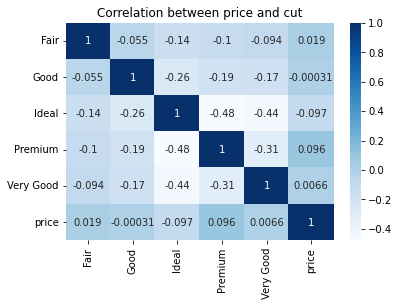

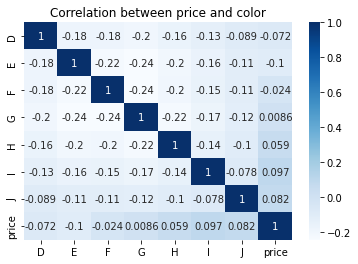

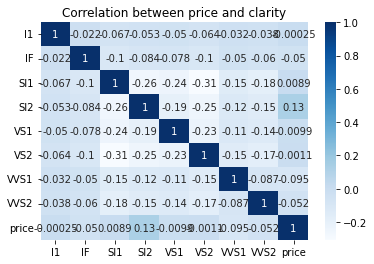

In [ ]:
cat_corr(train,'price')

In [ ]:
train_cat

,cut,color,clarity,price
0,Ideal,E,SI2,326
1,Premium,E,SI1,326
2,Good,E,VS1,327
3,Premium,I,VS2,334
4,Good,J,SI2,335
...,...,...,...,...
53938,Premium,H,SI2,2757
53939,Ideal,D,SI2,2757
53940,Premium,E,SI1,2756
53941,Premium,F,SI1,2756


In [ ]:
def EDA_obj (data):
  colors = sns.color_palette("Blues")
  for i in data.columns:
    if data[i].dtypes == 'object':
      group_data = data.groupby([i],as_index=False).count()
      sns.barplot(x =i,y = 'price',data = group_data ,palette='Blues')
      plt.title('%s barplot'%i)
      plt.xticks(rotation=45)
      plt.show()

      plt.pie(group_data['price']/100, labels=group_data[i], autopct='%.1f%%', colors = colors)
      plt.title('%s pie plot'%i)
      plt.show()

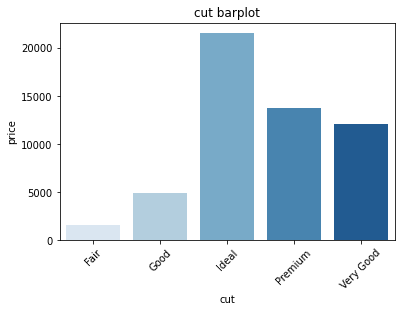

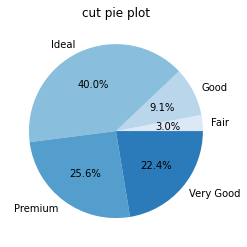

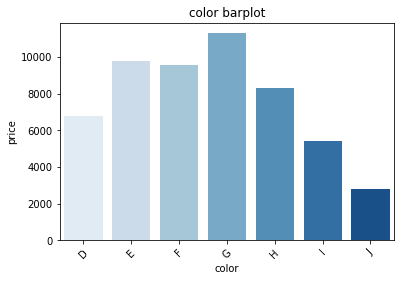

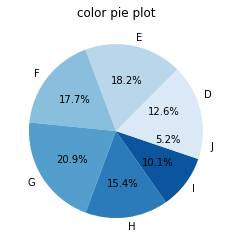

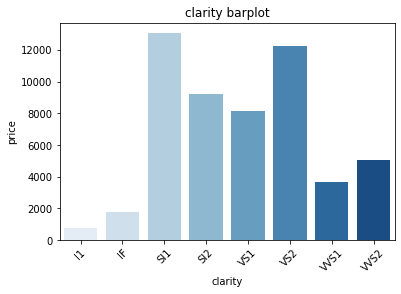

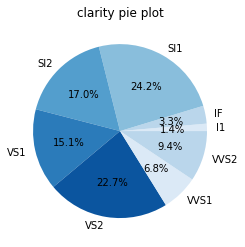

In [ ]:
EDA_obj(train)